# Data Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib as mpl

import random

In [2]:
# Baca dataset dari csv
data = pd.read_csv('used_cars.csv')
data

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


### Correlation Data

Text(0.5, 1, 'Correlation Data')

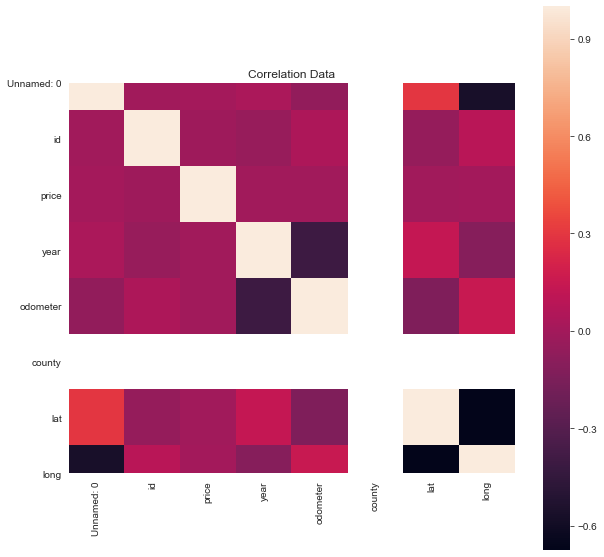

In [3]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Data")

### Pemilihan Fitur untuk Clustering

In [4]:
cluster_data = data[['id','price']]
cluster_data

,id,price
0,7034441763,17899
1,7034440610,0
2,7034440588,46463
3,7034440546,0
4,7034406932,49999
...,...,...
19996,7049052853,49999
19997,7049052797,12127
19998,7049049369,0
19999,7049042761,14661


In [5]:
cluster_data.describe()

,id,price
count,2.000100e+04,2.000100e+04
mean,7.043199e+09,7.664058e+04
std,4.668820e+06,8.335762e+06
min,7.032597e+09,0.000000e+00
25%,7.040114e+09,3.970000e+03
50%,7.043866e+09,8.795000e+03
75%,7.047065e+09,1.749500e+04
max,7.050101e+09,1.172420e+09


In [6]:
cluster_data.head()

,id,price
0,7034441763,17899
1,7034440610,0
2,7034440588,46463
3,7034440546,0
4,7034406932,49999


In [7]:
# Simpan dataset ke csv
cluster_data.to_csv("clustering_dataset.csv", index=False)

### Cek missing values

In [8]:
missing_values = cluster_data.isnull().sum()
missing_values

id       0
price    0
dtype: int64

Tidak ada missing value

### Cek outlier pada data

In [9]:
def boxPlot(cluster_data1, cluster_data2):
    mpl.rcParams['figure.dpi'] = 100
    plt.figure(figsize=(60, 60))
    f, axes = plt.subplots(1, 2)
    sns.boxplot(y=cluster_data1, ax=axes[0])
    sns.boxplot(y=cluster_data2, ax=axes[1])
    plt.subplots_adjust(wspace=1)

<Figure size 6000x6000 with 0 Axes>

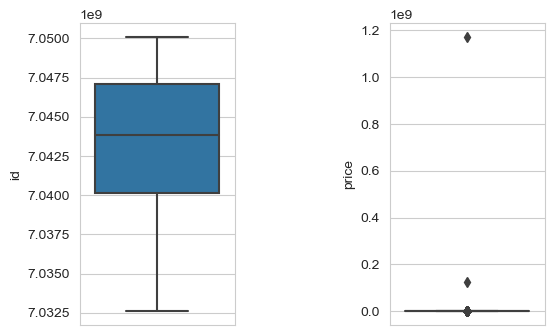

In [10]:
boxPlot(data["id"], data["price"])

### Menghilangkan outlier
Bagian visualisasi outlier perlu di run 2 kali lagi agar outlier hilang

In [11]:
def setbound(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    print(Q1, Q3)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [12]:
def getOutlierData(cluster_data, mainData):
    lowerbound,upperbound = setbound(cluster_data)
    return mainData[(cluster_data < lowerbound) | (cluster_data > upperbound)]

In [13]:
def outliering(cluster_data1, cluster_data2, mainData):
    while True:
        lowerbound,upperbound = setbound(cluster_data1)
        res1 = getOutlierData(cluster_data1, mainData)
#         print(getOutlierData(data1, mainData))

        lowerbound,upperbound = setbound(cluster_data2)
#         print(getOutlierData(data2, mainData))
        res2 = getOutlierData(cluster_data2, mainData)
        
        res = pd.concat([res1,res2]).drop_duplicates()
        res = res.index

        print('Total Outliers = ',len(res))
        print('=== The Outliers ===')
        print(res)    
        mainData.drop(res, inplace=True)

        if(len(res)==0):
            break
    print("BLOXPOT AFTER OUTLIERING")
    boxPlot(mainData['id'], mainData['price'])
    return mainData

7040135988.0 7047064398.0
7040135988.0 7047064398.0
3750.0 16000.0
3750.0 16000.0
Total Outliers =  141
=== The Outliers ===
Int64Index([    6,     9,    16,    40,    71,   131,   145,   340,   410,
              418,
            ...
            18987, 19070, 19116, 19170, 19174, 19246, 19264, 19383, 19484,
            19563],
           dtype='int64', length=141)
7040135988.0 7047064398.0
7040135988.0 7047064398.0
3750.0 16000.0
3750.0 16000.0
Total Outliers =  0
=== The Outliers ===
Int64Index([], dtype='int64')
BLOXPOT AFTER OUTLIERING


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 6000x6000 with 0 Axes>

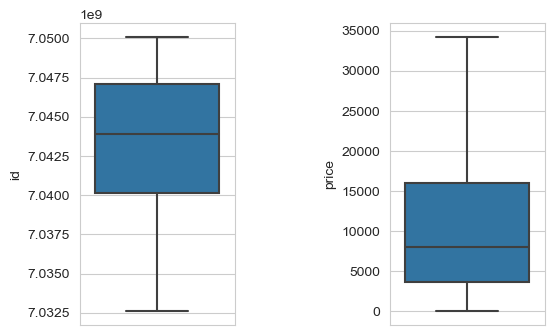

In [32]:
# Visualisasi dari cek outlier
newData = outliering(data["id"], data["price"], data)

### Visualisasi Data Exploration

<Figure size 5000x5000 with 0 Axes>

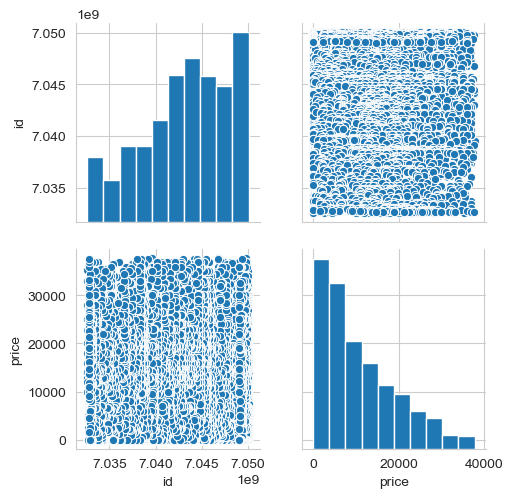

In [15]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(50, 50))
df_nona= newData[newData['id'].notnull()]
g = sns.pairplot(df_nona[['id', 'price']] )

In [16]:
# data_train = np.array([data['id'],data['price']])
data_train = []
data_train

[]

### Data Train

In [17]:
for item in cluster_data.values:
#     print(item[1])
    data_train.append([item[0], item[1]])
data_train

[[7034441763, 17899],
 [7034440610, 0],
 [7034440588, 46463],
 [7034440546, 0],
 [7034406932, 49999],
 [7034406582, 13999],
 [7034405619, 34500],
 [7034405349, 14500],
 [7034404595, 12500],
 [7034401857, 34500],
 [7034401494, 5900],
 [7034400341, 16500],
 [7034398060, 14500],
 [7034396354, 27999],
 [7034395505, 14999],
 [7034395342, 24999],
 [7034394805, 35500],
 [7034385254, 8999],
 [7034384679, 5999],
 [7034384490, 63500],
 [7034384400, 13500],
 [7034374035, 31895],
 [7034366554, 9500],
 [7034290597, 57995],
 [7034278551, 4600],
 [7034261745, 32995],
 [7034229439, 39995],
 [7034206084, 26950],
 [7034195717, 39995],
 [7033845439, 8300],
 [7034166384, 30000],
 [7034158475, 43995],
 [7034118739, 37995],
 [7034078036, 43995],
 [7034037779, 59995],
 [7034014908, 27476],
 [7033992818, 23500],
 [7033974897, 15475],
 [7033963404, 15475],
 [7033943607, 3995],
 [7033939797, 34900],
 [7033921130, 21475],
 [7033912739, 14476],
 [7047631382, 23295],
 [7033844851, 0],
 [7033844817, 0],
 [703384478

In [18]:
train = np.array(data_train)
len(train)

20001

### Data Dependen

In [19]:
label = np.array(cluster_data['price'])
len(label)

20001

In [20]:
# Split dataset 80% dan 20% secara random
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 100)

# K-Means

## Elbow Method

In [21]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [22]:
cluster_data = data[['id','price']]
cluster_data

,id,price
0,7034441763,17899
1,7034440610,0
3,7034440546,0
5,7034406582,13999
6,7034405619,34500
...,...,...
19995,7049052983,24999
19997,7049052797,12127
19998,7049049369,0
19999,7049042761,14661


### Plot Data

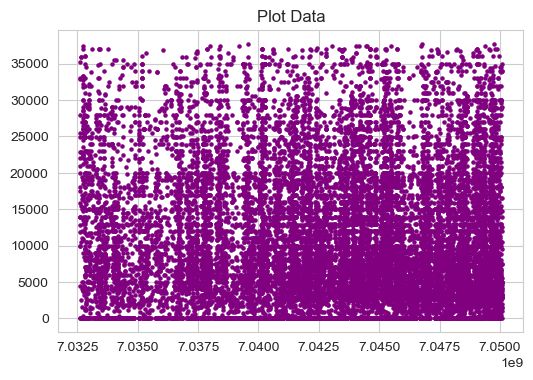

In [23]:
plt.scatter(cluster_data.id, cluster_data.price, s =5, c = 'purple', marker = 'o', alpha = 1)
plt.title('Plot Data')
plt.show()

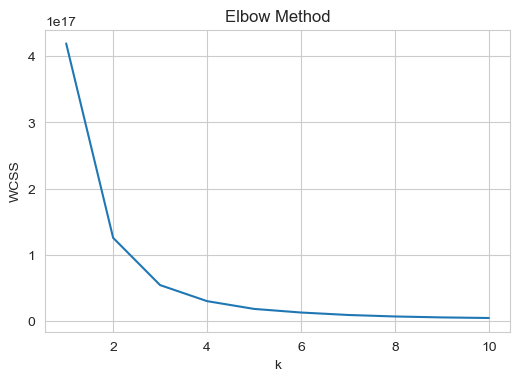

In [24]:
# Menentukan nilai k
X = cluster_data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

### Kesimpulan
Jumlah cluster yang optimal dengan memilih nilai k pada "Elbow Method" yaitu titik di mana distorsi / inersia mulai menurun secara linear. Jadi untuk data yang diberikan, dapat di simpulkan bahwa jumlah optimal cluster untuk data adalah rentang 2 sampai 4.

## SSE

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


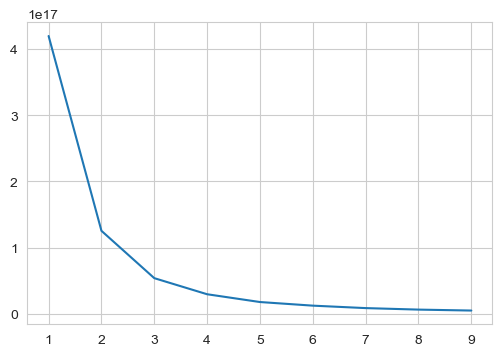

In [25]:
def sse(cluster_data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(cluster_data)
            cluster_data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(cluster_data)
            cluster_data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

sse(cluster_data[['id']], maxK=10)


In [26]:
def sseScore(X, centroids):
    k = 2
    for row in X:
        distances = [euclidean_distance(row,point) for point in centroids]
        k += min(distances)**2
    return k

In [27]:
print('Nilai SSE Clustering adalah : ', sseScore)

Nilai SSE Clustering adalah :  <function sseScore at 0x00000178E203E678>


### Kesimpulan
Evaluasi Clustering menggunakan SSE Score

## Analisis Silhouette

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [29]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # Untuk reproduktifitas

range_n_clusters = [2]

For n_clusters = 2 The average silhouette_score is : 0.8534455059337385


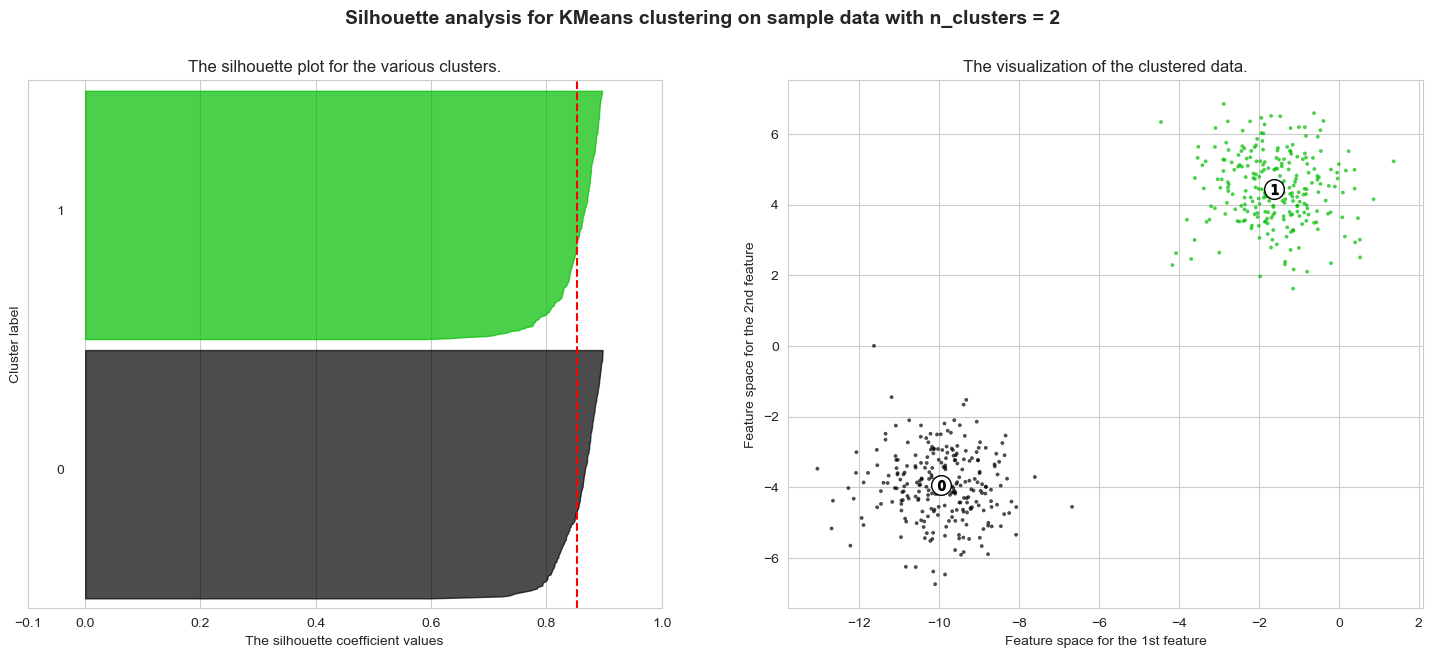

In [30]:
for n_clusters in range_n_clusters:
    # Buat subplot dengan 1 baris dan 2 kolom
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Subplot pertama adalah plot siluet
    # Koefisien siluet dapat berkisar dari -1, 1 tetapi dalam contoh ini semua
    # Terletak di dalam [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters + 1) * 10 adalah untuk menyisipkan ruang kosong antara siluet
    # Plot kelompok individu, untuk membatasi mereka dengan jelas.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inisialisasi clusterer dengan nilai n_clusters dan generator acak
    # seed 10 untuk reproduksibilitas.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score memberikan nilai rata-rata untuk semua sampel.
    # Ini memberikan perspektif ke dalam kepadatan dan pemisahan yang terbentuk
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Hitung skor siluet untuk setiap sampel
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Gabungkan skor siluet untuk sampel milik
        # cluster i, dan urutkan mereka
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Beri label plot siluet dengan nomor clusternya di tengah
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Hitung y_lower baru untuk plot berikutnya
        y_lower = y_upper + 10  # 10 untuk 0 sampel

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Garis vertikal untuk skor rata-rata siluet dari semua nilai
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Bersihkan label
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Plot ke-2 menunjukkan kelompok sebenarnya yang terbentuk
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Kesimpulan
Dari data di atas, didapatkan dengan menggunakan cara analisis silhouette mendapatkan hasil 0.85 atau 85%